### Домашнее задание №2 ###

**1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).**

**2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

**3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.**

**4. *Сравните на графиках изменение весов признаков от lambda в L1-регуляризации и L2-регуляризации (на данных из урока).**

**5. *Постройте графики зависимости весов двух признаков (стаж и стоимость занятия) от количества итераций для градиентного спуска и для стохастического градиентного спуска (на данных из урока).**

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). ####

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_std_feat(x):
    s = (x - x.mean()) / x.std()
    return s

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
        #if i % (iterations / 10) == 0:
         #   print(i, W, err)
    return W

In [4]:
X_st = X.copy().astype(np.float64)

X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

eval_model_reg2(X_st, y, 1000, 1e-4, 2000)

array([0.02868566, 0.00546759, 0.00530292, 0.00531896])

In [5]:
%%time
xx = []
lamda = 0.0 
xx = np.insert(eval_model_reg2(X_st, y, 1000, 1e-4, lamda),0,lamda)
for lamda in np.arange(0.5,500.,0.5): 
    xx = np.vstack( (xx,np.insert(eval_model_reg2(X_st, y, 1000, 1e-4, lamda),0,lamda) )) 
#xx

Wall time: 27.6 s


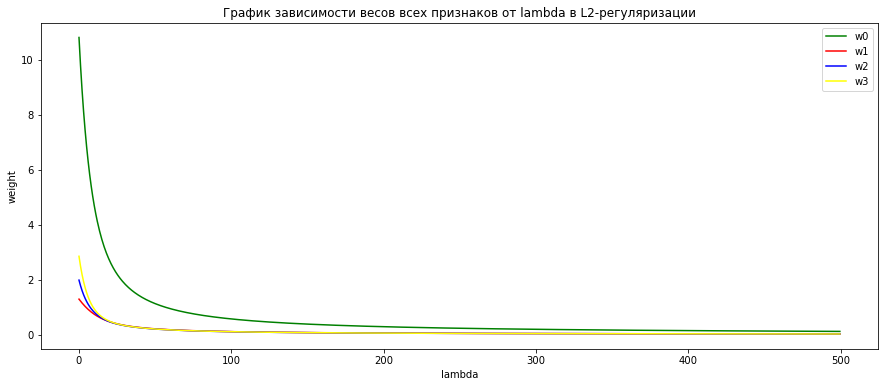

In [6]:
plt.figure(figsize=(15, 6))
plt.xlabel('lambda')
plt.ylabel('weight')
plt.plot(xx[:,0], xx[:,1],color='green',label='w0')
plt.plot(xx[:,0], xx[:,2],color='red',label='w1')
plt.plot(xx[:,0], xx[:,3],color='blue',label='w2')
plt.plot(xx[:,0], xx[:,4],color='yellow',label='w3')
plt.legend()
plt.title('График зависимости весов всех признаков от lambda в L2-регуляризации')
plt.show()

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию? 

**Ответ: Да, можно применить.**

**3. *Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.**

In [7]:
def eval_model_reg(X, y, iterations, alpha=1e-4, lambda_=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations + 1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        #if i % (iterations / 10) == 0:
         #   print(i, W, err,n)
    return W

In [8]:
eval_model_reg(X_st, y, 1000, 1e-1, 0.0)

array([57.4       ,  6.12241511,  1.42846592,  4.11637115])

In [9]:
%%time
xx = []
lamda = 0.0 
xx = np.insert(eval_model_reg(X_st, y, 1000, 1e-4, lamda),0,lamda)
for lamda in np.arange(0.5,500.,0.5): 
    xx = np.vstack( (xx,np.insert(eval_model_reg(X_st, y, 1000, 1e-4, lamda),0,lamda) ))
#xx

Wall time: 28.4 s


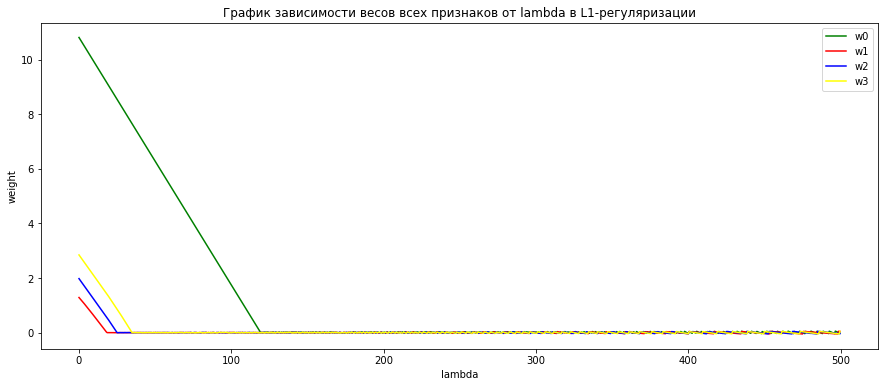

In [10]:
plt.figure(figsize=(15, 6))
plt.xlabel('lambda')
plt.ylabel('weight')
plt.plot(xx[:,0], xx[:,1],color='green',label='w0')
plt.plot(xx[:,0], xx[:,2],color='red',label='w1')
plt.plot(xx[:,0], xx[:,3],color='blue',label='w2')
plt.plot(xx[:,0], xx[:,4],color='yellow',label='w3')
plt.legend()
plt.title('График зависимости весов всех признаков от lambda в L1-регуляризации')
plt.show()

**4. *Сравните на графиках изменение весов признаков от lambda в L1-регуляризации и L2-регуляризации (на данных из урока).**

**Ответ: L1 регуляризация более грубая чем L2**